<a href="https://colab.research.google.com/github/cabarros3/data_analysis/blob/main/skoob/skoob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

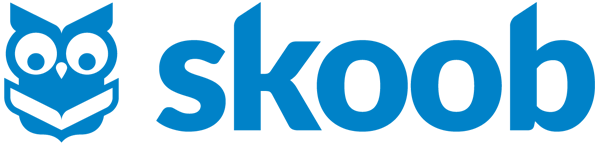
# Data Analysis - SKOOB

1.   **O que é o skoob?**

  Skoob é uma rede social colaborativa brasileira para leitores, lançada em janeiro de 2009 pelo desenvolvedor Lindenberg Moreira. O site tornou-se um ponto de encontro para leitores e novos escritores, que trocam sugestões de leitura e organizam reuniões em livrarias. Seu nome deriva da palavra books, ao contrário

2.   **Como funciona?**

  No Skoob podemos criar nosso status de leitura, adicionar um rating ao livro que estamos lendo ou que já lemos e podemos adicionar resenhar desses livros.


### Sumário do notebook

*   [Data Pre-processing](https://colab.research.google.com/drive/15P1Xod8P5bhVp_0K4LUl9_U8fcONB0FO#scrollTo=-GjchBeR85CH&line=1&uniqifier=1)
  
  * Importando as bibliotecas
  * Importando o arquivo 
  * Visualizando o shape do arquivo
  * Data Cleaning
*   [Data Analysis](https://colab.research.google.com/drive/15P1Xod8P5bhVp_0K4LUl9_U8fcONB0FO#scrollTo=EX0Chj1gCGXl&line=1&uniqifier=1)
 * NWhich are the books with most occurances in the list?
 * What is the distribution of books across languages?
 * Which are the top 10 most rated books?
 * Which are the authors with most books?
 * Which are the top 10 highly rated authors?
 * What is the rating distribution for the books?
 * Is there relationship between ratings and review counts?
 * Is there a relationship between number of pages and ratings?
 * Is there a relationship between ratings and ratings count?
 * Which are the books with the highest reviews?
 
>[LINK do dataset no meu github](https://github.com/cabarros3/testes/blob/main/dados.csv)

>[Link do notebook de inspiração no Kaggle](https://www.kaggle.com/listonlt/books-data-visualisation-with-seaborn/comments)

>[Tutorial](https://www.alura.com.br/artigos/como-remover-linhas-e-colunas-no-pandas)





# Data Pre-processing

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
dados_skoob = pd.read_csv('https://raw.githubusercontent.com/cabarros3/data_analysis/9770967f415816718d11ca1a490088ecab7f676d/skoob/dados.csv')
dados_skoob.head()

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,9.786556e+12,6555601566,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,9.788551e+12,8551006274,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93
2,Recursão,Blake Crouch,9.788551e+12,8551005375,2020,320,português,Intrínseca,4.4,2,618,22,2,6,295,2,E se um dia memórias vívidas de coisas que nun...,Ficção / Ficção científica / Literatura Estran...,21,79
3,"M, o Filho do Século",Antonio Scurati,9.788551e+12,855100607X,2020,816,português,Intrínseca,4.6,60,12,1,0,951,49,55,"O romance M, o Filho do Século conta em trama ...","Biografia, Autobiografia, Memórias / História ...",37,63
4,Oblivion Song: Entre Dois Mundos,Robert Kirkman,9.788551e+12,8551006258,2020,136,português,Intrínseca,4.1,166,16,0,0,376,6,184,Mestre em traçar universos distópicos permeado...,"Ficção / HQ, comics, mangá / Literatura Estran...",44,56


### DATA CLEANING

In [ ]:
# drop columns 'ISBN_13', 'ISBN_10', 'descricao'

#create a dataset copy called 'df_skoob'
df_skoob = dados_skoob.drop(columns=['ISBN_13','ISBN_10','descricao'])
df_skoob.head(2)

,titulo,autor,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,genero,male,female
0,Orçamento sem falhas,Nath Finanças,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Drama / Ficção / Literatura Estrangeira / Susp...,7,93


In [ ]:
# rename columns 'paginas', 'genero'

df_skoob.rename(columns={'paginas':'total_paginas','genero':'genero_literario'}, inplace=True)
df_skoob.head(2)

,titulo,autor,ano,total_paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,genero_literario,male,female
0,Orçamento sem falhas,Nath Finanças,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Drama / Ficção / Literatura Estrangeira / Susp...,7,93


In [ ]:
# creating a filter to rating > 5
df_rating = df_skoob['rating'] <= 5
df_semifinal = df_skoob[df_rating]
#df_semifinal.sort_values('rating', ascending=False)  # verificar se o maior rating é 5

In [ ]:
# creating a filter to avaliacao != 0
df_ava = df_semifinal['avaliacao'] != 0
df_final = df_semifinal[df_ava]
# df_final.head(2) # verifica se na coluna avaliacao ainda existe algum valor 0

In [ ]:
df_final.info() # cheking the infos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11564 entries, 1 to 11974
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titulo            11564 non-null  object 
 1   autor             11562 non-null  object 
 2   ano               11564 non-null  int64  
 3   total_paginas     11564 non-null  int64  
 4   idioma            11563 non-null  object 
 5   editora           11563 non-null  object 
 6   rating            11564 non-null  float64
 7   avaliacao         11564 non-null  int64  
 8   resenha           11564 non-null  int64  
 9   abandonos         11564 non-null  int64  
 10  relendo           11564 non-null  int64  
 11  querem_ler        11564 non-null  int64  
 12  lendo             11564 non-null  int64  
 13  leram             11564 non-null  int64  
 14  genero_literario  11135 non-null  object 
 15  male              11564 non-null  int64  
 16  female            11564 non-null  int64 

In [ ]:
df_final.isnull().sum() #cheking for any null values

titulo                0
autor                 2
ano                   0
total_paginas         0
idioma                1
editora               1
rating                0
avaliacao             0
resenha               0
abandonos             0
relendo               0
querem_ler            0
lendo                 0
leram                 0
genero_literario    429
male                  0
female                0
dtype: int64

In [ ]:
df_final.dropna(inplace=True) #dropando todos os nulos do dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final.isnull().sum() #verificando se ainda existe algum nulo

titulo              0
autor               0
ano                 0
total_paginas       0
idioma              0
editora             0
rating              0
avaliacao           0
resenha             0
abandonos           0
relendo             0
querem_ler          0
lendo               0
leram               0
genero_literario    0
male                0
female              0
dtype: int64

In [ ]:
df_final.info() # verificando as infos novamente

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11133 entries, 1 to 11974
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titulo            11133 non-null  object 
 1   autor             11133 non-null  object 
 2   ano               11133 non-null  int64  
 3   total_paginas     11133 non-null  int64  
 4   idioma            11133 non-null  object 
 5   editora           11133 non-null  object 
 6   rating            11133 non-null  float64
 7   avaliacao         11133 non-null  int64  
 8   resenha           11133 non-null  int64  
 9   abandonos         11133 non-null  int64  
 10  relendo           11133 non-null  int64  
 11  querem_ler        11133 non-null  int64  
 12  lendo             11133 non-null  int64  
 13  leram             11133 non-null  int64  
 14  genero_literario  11133 non-null  object 
 15  male              11133 non-null  int64  
 16  female            11133 non-null  int64 

In [ ]:
df_final.describe()

,ano,total_paginas,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,male,female
count,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000,11133.000000
mean,2008.490434,279.693524,3.928169,121.272613,50.340250,37.499147,10.538399,150.673853,53.261924,127.863828,26.661547,73.219707
std,64.123377,173.831600,0.465171,205.011862,125.451798,117.239476,60.057284,233.021993,129.134892,206.853120,19.415893,19.563395
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,175.000000,3.700000,6.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,11.000000,61.000000
50%,2012.000000,256.000000,4.000000,26.000000,4.000000,2.000000,0.000000,35.000000,8.000000,31.000000,24.000000,76.000000
75%,2016.000000,352.000000,4.200000,128.000000,33.000000,15.000000,2.000000,189.000000,38.000000,143.000000,39.000000,89.000000
max,2021.000000,4606.000000,5.000000,999.000000,985.000000,993.000000,877.000000,999.000000,994.000000,999.000000,100.000000,100.000000


# Exploratory Analysis

**Which are the books with most occurances in the list?**

In [ ]:
df_final['titulo'].value_counts()[:20]

O Alquimista                               11
Brida                                       8
Harry Potter e o Prisioneiro de Azkaban     8
Piadas Nerds                                7
Harry Potter e as Relíquias da Morte        7
Harry Potter e a Ordem da Fênix             7
Inferno                                     7
Harry Potter e o Cálice de Fogo             7
Harry Potter e a Câmara Secreta             7
Harry Potter e o Enigma do Príncipe         7
As Valkírias                                7
Extraordinário                              6
Silêncio                                    6
Diário de Uma Garota Nada Popular           6
O Símbolo Perdido                           6
A Cruz de Fogo                              6
Crepúsculo                                  6
The Walking Dead                            6
Filhos do Éden                              6
Box Coleção Agatha Christie                 6
Name: titulo, dtype: int64

**What happend here...**


---


We can see that **O alquimista** and **Brida** have the most number of occurrances with the same name in the data.

As we can see in the **graph 01**

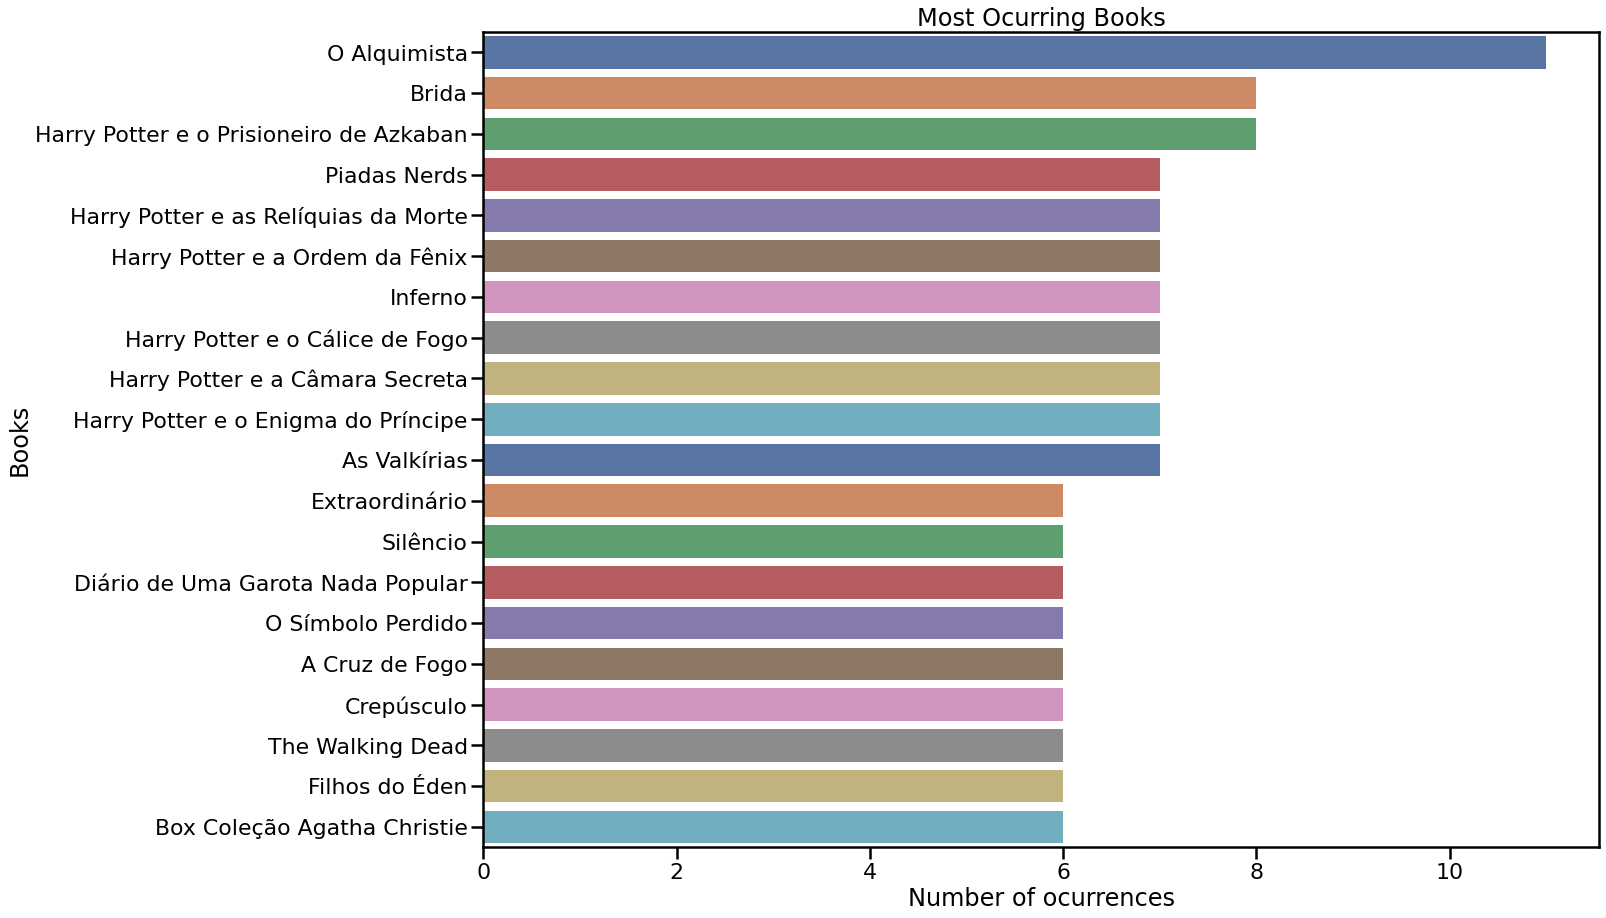

In [ ]:
#graph 01
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df_final['titulo'].value_counts()[:20]
rating = df_final.rating[:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title('Most Ocurring Books')
plt.xlabel('Number of ocurrences')
plt.ylabel('Books')
plt.show()

In [ ]:
# verificando os livros com mais avaliações avaliacao > 500
top_ten = df_final[df_final['avaliacao'] > 500]
top_ten.sort_values(by = 'rating', ascending=False).head(10) # ordenar por rating


,titulo,autor,ano,total_paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,genero_literario,male,female
2066,Queda de Gigantes,Ken Follett,2010,912,português,Sextante,4.8,525,19,18,0,583,82,1,Ficção / História,32,68
3309,Corrente de Ouro,Cassandra Clare,2020,598,português,Galera,4.7,748,121,0,2,2,281,343,Fantasia / Ficção / Literatura Estrangeira / R...,9,91
3315,Corrente de Ouro,Cassandra Clare,2020,625,português,Galera,4.7,748,121,0,2,2,281,343,Fantasia / Ficção / Literatura Estrangeira / R...,9,91
11062,Irmãs em Auschwitz,Rena Kornreich Gelissen,2015,406,português,Universo,4.7,672,72,7,0,1,42,896,"Literatura Estrangeira / Biografia, Autobiogra...",11,89
4338,O Caminho de Casa,Yaa Gyasi,2017,448,português,Rocco,4.7,505,50,7,0,1,65,630,Com uma narrativa poderosa e envolvente que c...,14,86
666,A Ascensão da Sombra,Robert Jordan,2015,991,português,Intrínseca,4.7,734,32,4,3,1,99,1,Romance / Fantasia / Literatura Estrangeira,57,43
4220,Sulwe,Lupita Nyongo,2019,48,português,Rocco,4.7,510,89,0,0,1,9,567,Fantasia / Ficção / Infantil,9,91
3349,Fantasmas do Mercado das Sombras,Cassandra Clare,2019,476,português,Galera,4.6,892,122,3,2,2,155,982,Fantasia / Ficção / Literatura Estrangeira,12,88
7625,Destinos Quebrados,Sofia Silva,2019,248,português,Editora,4.6,501,79,2,0,2,30,587,Ficção / Literatura Estrangeira / Romance,3,97
3473,A Court of Wings and Ruin,Sarah J. Maas,2017,699,português,Bloomsbury,4.6,625,38,3,3,260,30,820,Fantasia / Ficção / Jovem adulto / Literatura ...,4,96


**What happend here...**


---



where avalicao > 500 we can see the first 10 books with the average rating.  We saw that the maximum rating in our data was 5.0 but we dont see any books in the above result with 5.0 rating. This is because we filtered these books on the basis of the number of ratings. We made sure that all the books that we have in the above results have a decent amount of rating. There can be books in the data that can have only 1 or 2 ratings can be rated 5.0. We want to avoid such books hence this sort of filtering.

As we can see this in **graph 02**


Text(0.5, 1.0, 'Top ten most rated books by rating')

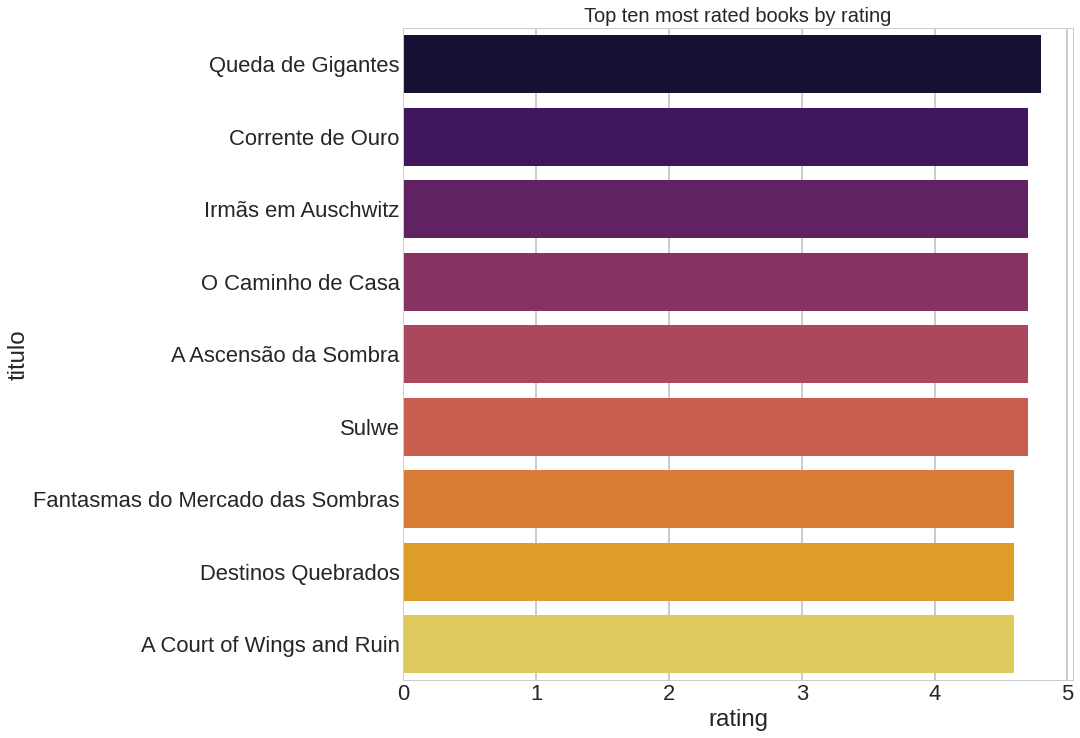

In [ ]:
# graph 02
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,12))
data = top_ten.sort_values(by='rating', ascending=False).head(10)
sns.barplot(x = 'rating', y = 'titulo', data = data, palette='inferno')
plt.title('Top ten most rated books by rating', fontsize=20)


**What is the distribution of books across languages?**

In [ ]:
df_final.groupby('idioma')['titulo'].count()

idioma
espanhol        20
francês          1
inglês          68
italiano         1
português    11043
Name: titulo, dtype: int64

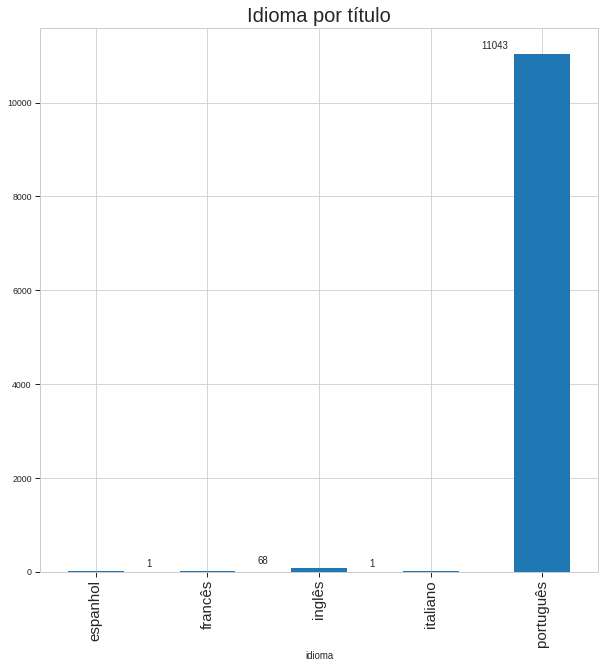

In [ ]:
sns.set_context('paper')
plt.figure(figsize=(10,10))
ax = df_final.groupby('idioma')['titulo'].count().plot.bar()
plt.title('Idioma por título', fontsize=20)
plt.xticks(fontsize=15)
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

**What happend here...**


---
A maior quantidade de títulos está em português com um total de 11043.

Segunda maior quantidade de títulos está em inglês com um total de 68 títulos.


**Which are the authors with most books?**


In [ ]:
df_final.groupby('autor')['titulo'].count().reset_index().sort_values('titulo', ascending=False).head(10).set_index('autor')

,titulo
autor,
Clarice Lispector,102
Rick Riordan,76
Meg Cabot,72
J.K. Rowling,66
Rocco,66
Paulo Coelho,64
Augusto Cury,62
Lucasfilm Ltd.,55
Anne Rice,54


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


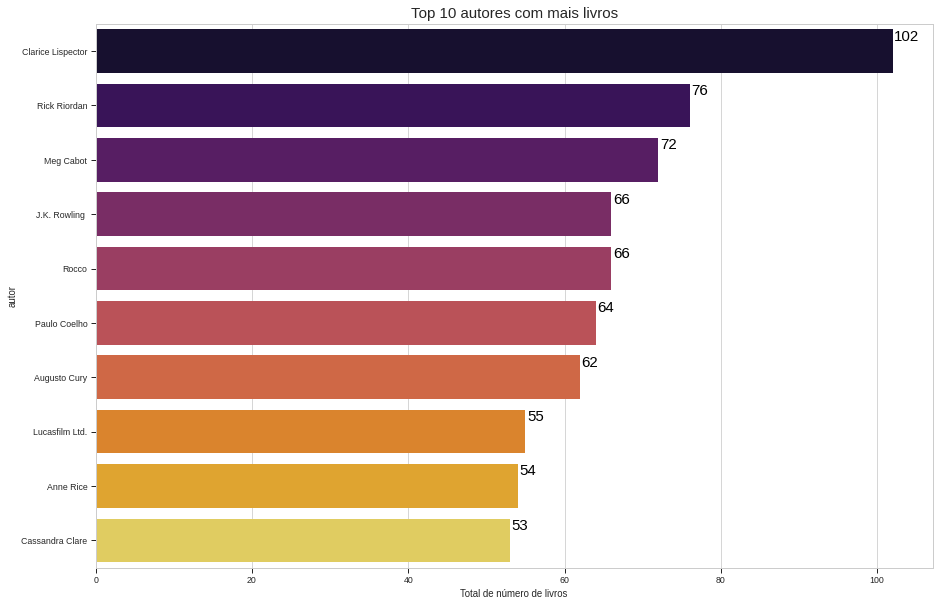

In [ ]:
most_books = df_final.groupby('autor')['titulo'].count().reset_index().sort_values('titulo', ascending=False).head(10).set_index('autor')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['titulo'], most_books.index, palette='inferno')
ax.set_title('Top 10 autores com mais livros', fontsize=15)
ax.set_xlabel('Total de número de livros')
totals_2 = []
for i in ax.patches:
  totals_2.append(i.get_width())
sum(totals_2)
for i in ax.patches:
  ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

**Which are the top 10 highly rated authors?**


---



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


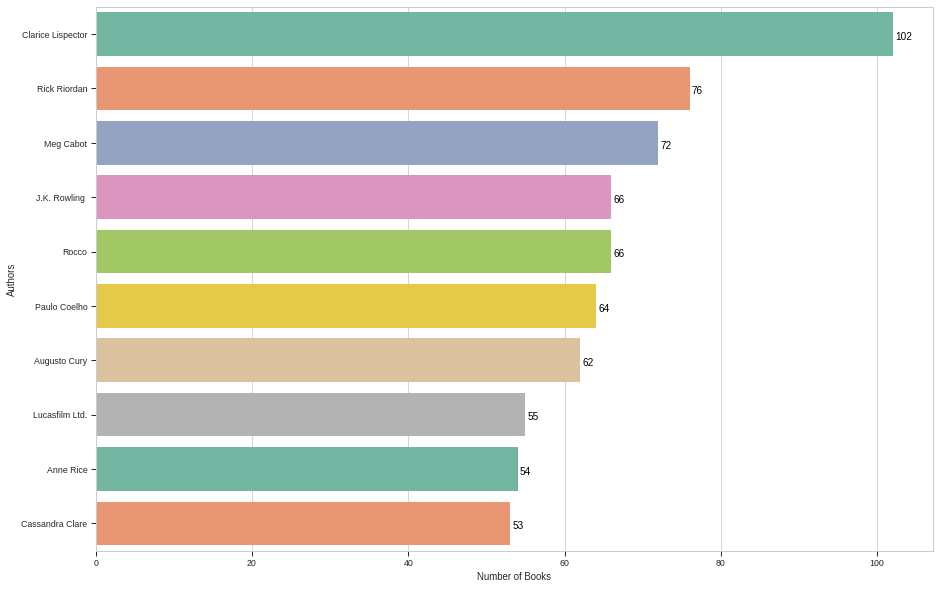

In [ ]:
high_rated_author = df_final[df_final['rating'] >= 4.3]
high_rated_author = df_final.groupby('autor')['titulo'].count().reset_index().sort_values('titulo', ascending=False).head(10).set_index('autor')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['titulo'], high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

**What is the rating distribution for the books?**


---



<Figure size 720x576 with 0 Axes>

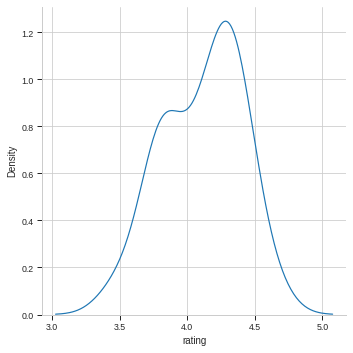

In [ ]:
plt.figure(figsize=(10,8))
ratiing = df_final.rating.astype(float)
sns.displot(data = rating, kind='kde')

**Is there relationship between ratings and review counts?**


---



<Figure size 720x720 with 0 Axes>

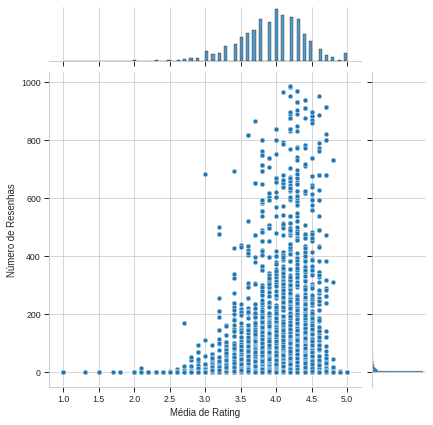

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('paper')
ax = sns.jointplot(x = 'rating', y='resenha', kind='scatter', data = df_final[['rating', 'resenha']])
ax.set_axis_labels('Média de Rating', 'Número de Resenhas')
plt.show()

**Is there a relationship between number of pages and ratings?**


---



<Figure size 1008x576 with 0 Axes>

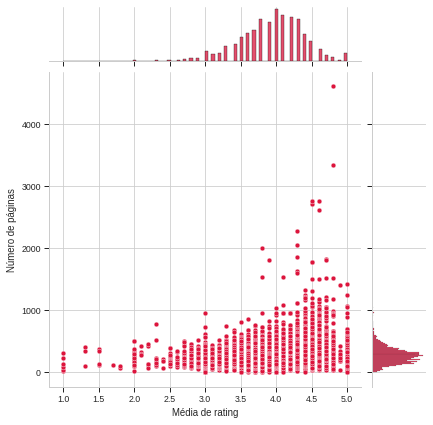

In [ ]:
plt.figure(figsize=(14,8))
sns.set_context('paper')
ax = sns.jointplot(x = 'rating', y='total_paginas', data = df_final, color='crimson')
ax.set_axis_labels('Média de rating', 'Número de páginas')
plt.show()

**Is there a relationship between ratings and ratings count?**


---



<Figure size 1008x576 with 0 Axes>

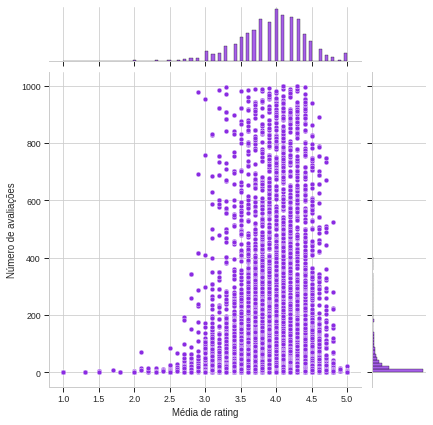

In [ ]:
plt.figure(figsize=(14,8))
sns.set_context('paper')
ax = sns.jointplot(x = 'rating', y = 'avaliacao', data = df_final, color = 'blueviolet')
ax.set_axis_labels('Média de rating', 'Número de avaliações')
plt.show()

**Which are the books with the highest reviews**

---



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


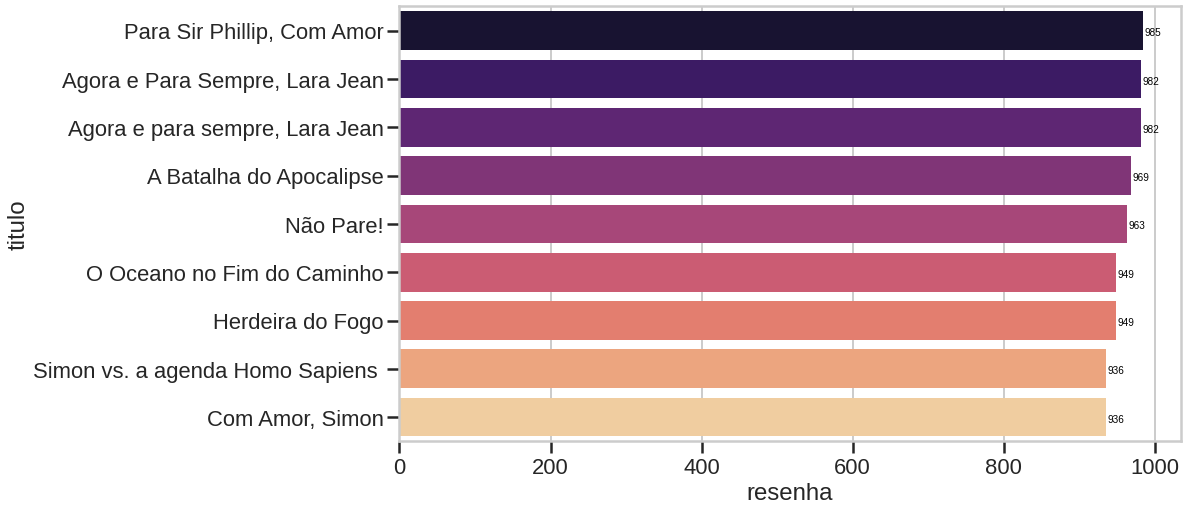

In [ ]:
most_text = df_final.sort_values('resenha', ascending=False).head(10).set_index('titulo')
plt.figure(figsize=(14,8))
sns.set_context('poster')
ax = sns.barplot(most_text['resenha'], most_text.index, palette='magma')
for i in ax.patches:
  ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
plt.show()